In [1]:
import time
start = time.time()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import FastICA
from announce import *

In [2]:
early_warning_url = "data_exp_2.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,frame_time,total_pacotes,total_pacotes_icmp,total_pacotes_udp,total_pacotes_tcp,maior_pacote,menor_pacote,soma_pacotes,total_ips_origem,...,10_coefficient_variation_std_tcp_time_relative,10_lag-1AC_std_tcp_time_relative,10_lag-2AC_std_tcp_time_relative,10_lag-3AC_std_tcp_time_relative,10_skw_mean_tcp_time_relative,10_kurt_mean_tcp_time_relative,10_coefficient_variation_mean_tcp_time_relative,10_lag-1AC_mean_tcp_time_relative,10_lag-2AC_mean_tcp_time_relative,10_lag-3AC_mean_tcp_time_relative
0,0,"Aug 18, 2011 10:39:35.087915000 -03",3802,6,420,3376,1514,60,2808555,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Aug 18, 2011 10:39:36.000024000 -03",3259,3,476,2780,1514,60,2097318,203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Aug 18, 2011 10:39:37.000915000 -03",3966,4,375,3587,1514,60,2851044,202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Aug 18, 2011 10:39:38.000263000 -03",3889,9,370,3508,1514,60,2781297,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Aug 18, 2011 10:39:39.000228000 -03",4077,2,362,3713,1514,60,2923539,184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,"Aug 18, 2011 10:55:42.001011000 -03",3720,2,2999,716,1514,60,3189759,188,...,0.125737,0.273077,0.220432,0.197854,1.035134,-0.235052,0.393167,0.677159,0.576804,0.460612
968,968,"Aug 18, 2011 10:55:43.000451000 -03",3567,5,2904,658,1514,60,2992278,183,...,0.125562,0.277090,0.228485,0.205409,1.035138,-0.235039,0.393165,0.732558,0.597029,0.490875
969,969,"Aug 18, 2011 10:55:44.000795000 -03",3515,6,2499,1009,1514,60,2700171,209,...,0.126851,0.279146,0.222232,0.202673,1.011561,-0.390780,0.384062,0.731762,0.575967,0.479029
970,970,"Aug 18, 2011 10:55:45.000278000 -03",3884,7,2179,1697,1514,60,2892316,211,...,0.126985,0.284554,0.221279,0.192221,1.055607,-0.265524,0.386897,0.728276,0.570962,0.466442


# Avaliação 1

In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
idioma = 'en'
labels_traducao = []
if idioma == 'en':
    labels_traducao = ['\n\nKurtosis of total \nsource IPs',
                      '\n\nCV of number packets',
                       '\n\nSkewness of total \ndestination IPs',
                       'Group 1',
                       'Group 2',
                       'Normal interval',
                       'Malicious interval',
                       '\n\nTotal source IPs',
                        '\n\nNumber packets',
                        '\n\nTotal destination IPs',
                      ]

In [5]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 542
init = 47
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
cm = confusion_matrix(y_real, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[447  38]
 [  0  10]]
              precision    recall  f1-score   support

           0     1.0000    0.9216    0.9592       485
           1     0.2083    1.0000    0.3448        10

    accuracy                         0.9232       495
   macro avg     0.6042    0.9608    0.6520       495
weighted avg     0.9840    0.9232    0.9468       495



<Figure size 640x480 with 0 Axes>

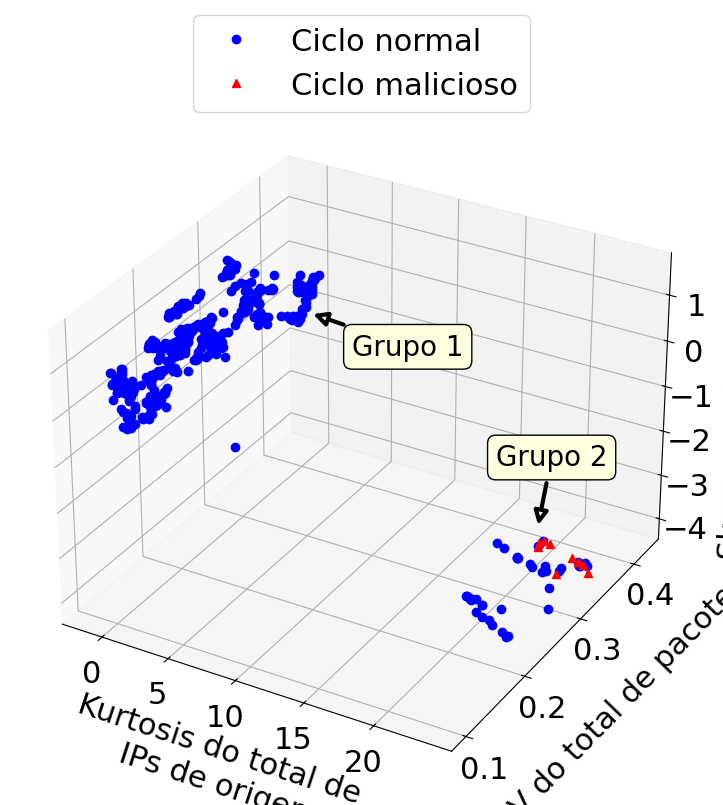

<Figure size 640x480 with 0 Axes>

In [6]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

font_size_group = 20
ax2.annotate3D('Grupo 1', (10, 0.2, 2),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (30, 0.1, 0.4),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()

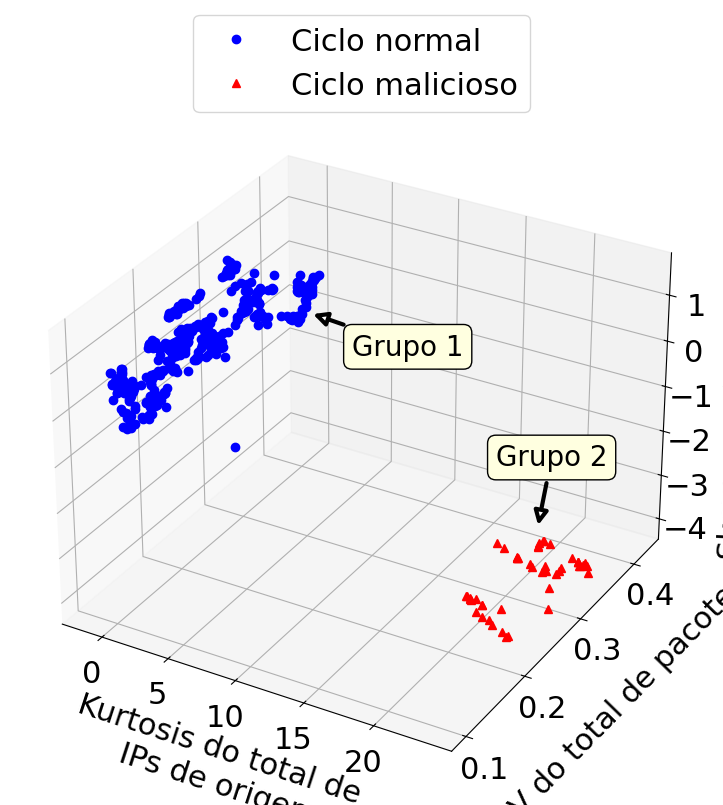

In [7]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20
ax2.annotate3D('Grupo 1', (10, 0.2, 2),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (30, 0.1, 0.4),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("cluster.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

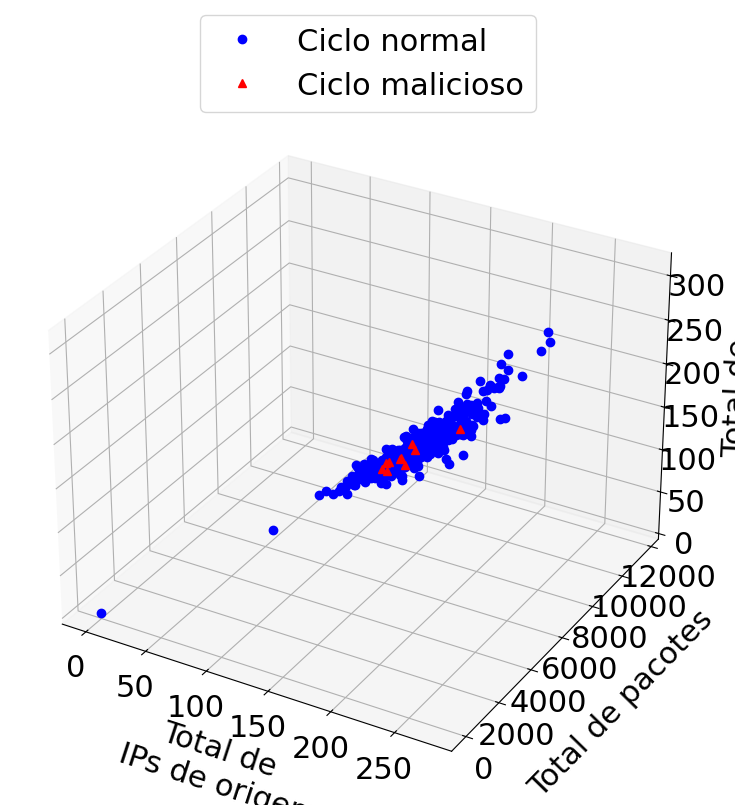

<Figure size 640x480 with 0 Axes>

In [8]:
colunas = ['total_ips_origem', 'total_ips_destino', 'total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nTotal de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nTotal de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()

# Avaliação 2

In [9]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 542
init = 47
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
resultado2 = announce(x_train)
pd.set_option('display.max_rows', resultado2.shape[0]+1)
resultado2.to_csv('resultado_teste_padrao_exp_1.csv', sep=";")
resultado2

,Algorithm,mean,Calinski_harabasz_score_minmax,Silhouette_score_minmax,CDBW_minmax,Davies_bouldin_score_minmax_normalizado,SDBW_minmax_normalizado,Calinski_harabasz_score,Silhouette_score,Davies_bouldin_score,SDBW,CDBW,Davies_bouldin_score_minmax,SDBW_minmax
0,MeanShift(),0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
1,"KMeans(n_clusters=2, random_state=0, tol=1)",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
2,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
3,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
4,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
5,"KMeans(n_clusters=2, random_state=0)",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
6,"KMeans(algorithm='elkan', n_clusters=2, random...",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
7,"KMeans(algorithm='elkan', n_clusters=2, random...",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
8,"KMeans(algorithm='elkan', n_clusters=2, random...",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220
9,"KMeans(algorithm='elkan', n_clusters=2, random...",0.938156,1.000000,1.000000,1.000000,1.000000,0.690780,19930.291393,0.943228,0.098175,0.215341,1.083024,0.000000,0.309220


In [10]:
print(resultado2['Algorithm'][28])
clustering = eval(resultado2['Algorithm'][28])
clustering.fit(format_data(x_train))
y_test = clustering.labels_
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

AgglomerativeClustering()
[[447  38]
 [  0  10]]
              precision    recall  f1-score   support

           0     1.0000    0.9216    0.9592       485
           1     0.2083    1.0000    0.3448        10

    accuracy                         0.9232       495
   macro avg     0.6042    0.9608    0.6520       495
weighted avg     0.9840    0.9232    0.9468       495



# Avaliação 3

In [11]:
cols = early_warning.columns[55:361]
print(cols)
limit = 542
init = 47
x_train_novo = early_warning[cols].copy()[init:limit]
y_real_novo = early_warning['has_bot'][init:limit]
x_train_novo = x_train_novo.fillna(0)

Index(['5_skw_total_pacotes', '5_kurt_total_pacotes',
       '5_coefficient_variation_total_pacotes', '5_lag-1AC_total_pacotes',
       '5_lag-2AC_total_pacotes', '5_lag-3AC_total_pacotes',
       '5_skw_total_pacotes_icmp', '5_kurt_total_pacotes_icmp',
       '5_coefficient_variation_total_pacotes_icmp',
       '5_lag-1AC_total_pacotes_icmp',
       ...
       '5_coefficient_variation_std_tcp_time_relative',
       '5_lag-1AC_std_tcp_time_relative', '5_lag-2AC_std_tcp_time_relative',
       '5_lag-3AC_std_tcp_time_relative', '5_skw_mean_tcp_time_relative',
       '5_kurt_mean_tcp_time_relative',
       '5_coefficient_variation_mean_tcp_time_relative',
       '5_lag-1AC_mean_tcp_time_relative', '5_lag-2AC_mean_tcp_time_relative',
       '5_lag-3AC_mean_tcp_time_relative'],
      dtype='object', length=306)


In [12]:
pca = FastICA(n_components=3).fit(x_train_novo)
novo  = pca.transform(x_train_novo)

In [13]:
resultado3 = announce(pd.DataFrame(novo),number_clusters=2,cluster_validity_metric = 'cdbw')
pd.set_option('display.max_rows', resultado3.shape[0]+1)
resultado3.to_csv("resultado_fs_exp_1.csv", sep=";")
resultado3

,Algorithm,cdbw
0,MeanShift(),0.700267
1,"KMeans(n_clusters=2, random_state=0, tol=1)",0.700267
2,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.700267
3,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.700267
4,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.700267
5,"KMeans(n_clusters=2, random_state=0)",0.700267
6,"KMeans(algorithm='elkan', n_clusters=2, random...",0.700267
7,"KMeans(algorithm='elkan', n_clusters=2, random...",0.700267
8,"KMeans(algorithm='elkan', n_clusters=2, random...",0.700267
9,"KMeans(algorithm='elkan', n_clusters=2, random...",0.700267


In [14]:
print(resultado3['Algorithm'][0]) 
clustering = eval(resultado3['Algorithm'][0]) 
y_test = clustering.fit_predict(novo)  
print(confusion_matrix(y_real_novo, y_test)) 
print(classification_report(y_real_novo, y_test, digits=6))

MeanShift()
[[447  38]
 [  0  10]]
              precision    recall  f1-score   support

           0   1.000000  0.921649  0.959227       485
           1   0.208333  1.000000  0.344828        10

    accuracy                       0.923232       495
   macro avg   0.604167  0.960825  0.652028       495
weighted avg   0.984007  0.923232  0.946815       495



In [15]:
end = time.time()
print(end - start)

285.00205278396606
